<div class="alert alert-block alert-success">
    
 
# Berkeley- PCMLAI: OH 3- Introduction to Data Analysis
    
 👨‍🏫 **Vikesh K**      
 #️⃣ **OH-3**  
 💼**[Car Price Analysis](https://docs.google.com/document/d/1zfLcBHbXo9OOoFh91uA46tjk_exWjw9LDcYlyV4YCi4/edit#heading=h.o29fbd83peof)**
    
     

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> ***All progress takes place outside the comfort zone- Michael Bobak***
    </font> 💡   

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading data 

**Please run the below code to ensure that you are able to load the data**

In [124]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/vehicles_us.csv'

df = pd.read_csv(url, parse_dates = ["date_posted"])

In [125]:
orig_df = df.copy()

In [126]:
df.sample(10)

price  model_year                     model  condition  cylinders  \
4753    5400      2011.0               ford fusion  excellent        4.0   
47122   3000      2004.0      ford f250 super duty       fair        8.0   
12577   6900      2013.0             ford explorer       good        6.0   
28765   8500      2014.0       dodge grand caravan   like new        NaN   
26390  11300         NaN                ford f-150       good        8.0   
39193  12999      2016.0              chrysler 300       good        6.0   
6017   23407      2014.0  chevrolet silverado 1500  excellent        6.0   
17135  16000      2011.0       chevrolet silverado  excellent        8.0   
6368   25100      2014.0  ford mustang gt coupe 2d       good        8.0   
16124   8995      2002.0     ford f-250 super duty  excellent        8.0   

         fuel  odometer transmission      type paint_color  is_4wd  \
4753      gas       NaN    automatic     sedan         NaN     NaN   
47122     gas  297000.0    automatic     truck       white     NaN   
12577     gas  151000.0    automatic       SUV       white     1.0   
28765     gas   85628.0    automatic  mini-van         NaN     NaN   
26390     gas  101500.0    automatic     truck         NaN     1.0   
39193     gas   24000.0    automatic     sedan        grey     NaN   
6017      gas       NaN    automatic    pickup        grey     NaN   
17135     gas   99000.0    automatic    pickup      silver     1.0   
6368      gas   33058.0        other     coupe       black     NaN   
16124  diesel  189000.0    automatic     truck         red     1.0   

      date_posted  days_listed  
4753   2019-02-25            8  
47122  2018-09-13           54  
12577  2018-06-08           37  
28765  2018-10-17            5  
26390  2019-03-24           27  
39193  2018-09-09            9  
6017   2018-07-24           66  
17135  2018-10-16           53  
6368   2018-08-21           52  
16124  2018-08-30           48

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Data Quality checks

**Missing values**

In [128]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [129]:
df.isna().mean().round(2).multiply(100)

price            0.0
model_year       7.0
model            0.0
condition        0.0
cylinders       10.0
fuel             0.0
odometer        15.0
transmission     0.0
type             0.0
paint_color     18.0
is_4wd          50.0
date_posted      0.0
days_listed      0.0
dtype: float64

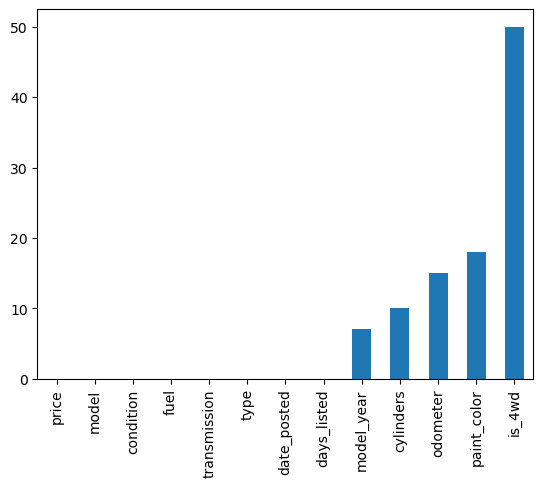

In [130]:
df.isna().mean().round(2).multiply(100).sort_values().plot(kind = "bar");

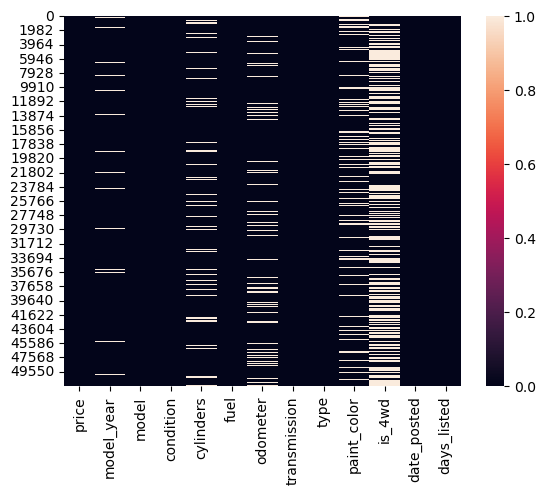

In [131]:
sns.heatmap(df.isna());

In [132]:
df["is_4wd"] = df["is_4wd"].fillna(0)

In [133]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

**Duplicates**

In [134]:
df.duplicated().sum()

0

**Outliers**

### EDA 

**Univariate Relationship**

In [135]:
df.describe().round(0)

price  model_year  cylinders  odometer   is_4wd  \
count   51525.0     47906.0    46265.0   43633.0  51525.0   
mean    12132.0      2010.0        6.0  115553.0      0.0   
min         1.0      1908.0        3.0       0.0      0.0   
25%      5000.0      2006.0        4.0   70000.0      0.0   
50%      9000.0      2011.0        6.0  113000.0      0.0   
75%     16839.0      2014.0        8.0  155000.0      1.0   
max    375000.0      2019.0       12.0  990000.0      1.0   
std     10041.0         6.0        2.0   65095.0      0.0   

                         date_posted  days_listed  
count                          51525      51525.0  
mean   2018-10-25 01:57:46.270742528         40.0  
min              2018-05-01 00:00:00          0.0  
25%              2018-07-29 00:00:00         19.0  
50%              2018-10-25 00:00:00         33.0  
75%              2019-01-21 00:00:00         53.0  
max              2019-04-19 00:00:00        271.0  
std                              NaN         28.0

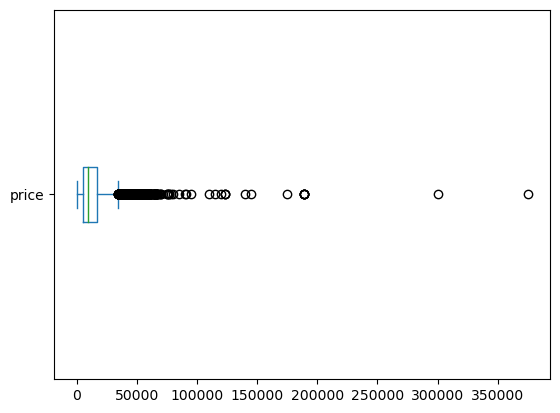

In [136]:
df["price"].plot(kind = "box", vert = False);

In [137]:
df.describe([0.05, 0.01, 0.85,0.90, 0.95, 0.99]).round(0)

price  model_year  cylinders  odometer   is_4wd  \
count   51525.0     47906.0    46265.0   43633.0  51525.0   
mean    12132.0      2010.0        6.0  115553.0      0.0   
min         1.0      1908.0        3.0       0.0      0.0   
1%          1.0      1990.0        4.0     117.0      0.0   
5%       1950.0      1999.0        4.0   16320.0      0.0   
50%      9000.0      2011.0        6.0  113000.0      0.0   
85%     21900.0      2016.0        8.0  179503.0      1.0   
90%     25200.0      2017.0        8.0  196000.0      1.0   
95%     30300.0      2018.0        8.0  223297.0      1.0   
99%     43995.0      2018.0       10.0  286800.0      1.0   
max    375000.0      2019.0       12.0  990000.0      1.0   
std     10041.0         6.0        2.0   65095.0      0.0   

                         date_posted  days_listed  
count                          51525      51525.0  
mean   2018-10-25 01:57:46.270742528         40.0  
min              2018-05-01 00:00:00          0.0  
1%               2018-05-04 00:00:00          3.0  
5%               2018-05-18 00:00:00          7.0  
50%              2018-10-25 00:00:00         33.0  
85%              2019-02-26 00:00:00         67.0  
90%              2019-03-16 00:00:00         77.0  
95%              2019-04-02 00:00:00         94.0  
99%              2019-04-16 00:00:00        132.0  
max              2019-04-19 00:00:00        271.0  
std                              NaN         28.0

* **Z-score**
* **IQR method**

In [138]:
df.shape

(51525, 13)

In [139]:
df = df.query("price >= 1950").query("price <= 44000").copy()

In [140]:
51525 - 48459 # dropped value

3066

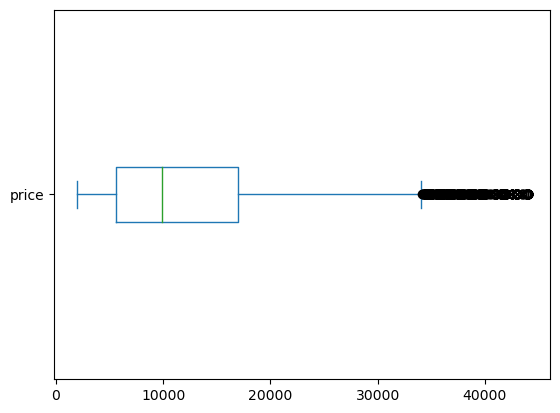

In [141]:
df["price"].plot(kind = "box", vert = False);

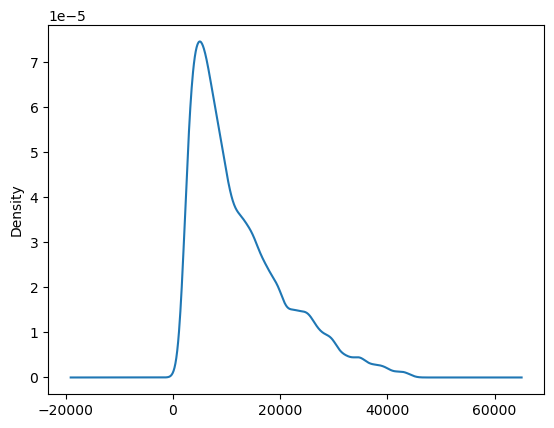

In [142]:
df["price"].plot(kind = "kde");

cylinders
8.0     15033
6.0     14870
4.0     13078
5.0       262
10.0      252
3.0        30
12.0        2
Name: count, dtype: int64

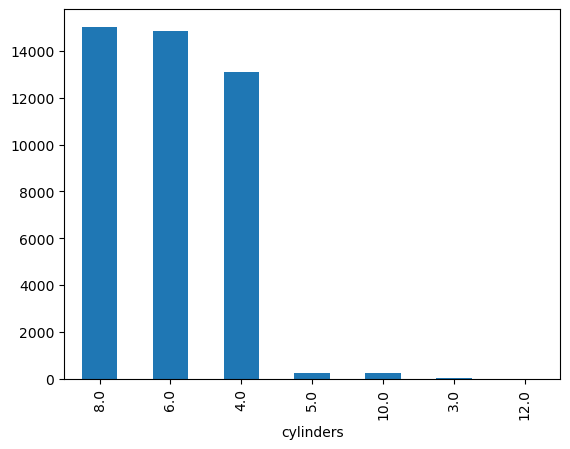

In [143]:
display(df['cylinders'].value_counts())

df['cylinders'].value_counts().plot(kind = "bar");

In [144]:
df.describe(include = "object")

model  condition   fuel transmission   type paint_color
count        48459      48459  48459        48459  48459       39734
unique         100          6      5            3     13          12
top     ford f-150  excellent    gas    automatic    SUV       white
freq          2645      23339  44489        44380  11668        9450

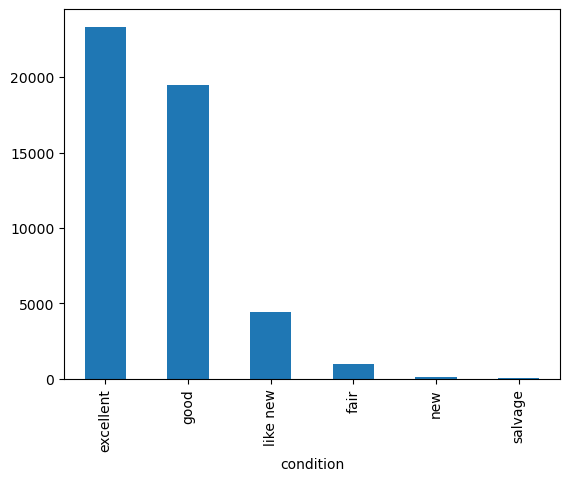

In [145]:
df.condition.value_counts().plot(kind = "bar");

**Bivariate Relationship**

In [146]:
corr = df.corr(numeric_only = True).round(2)

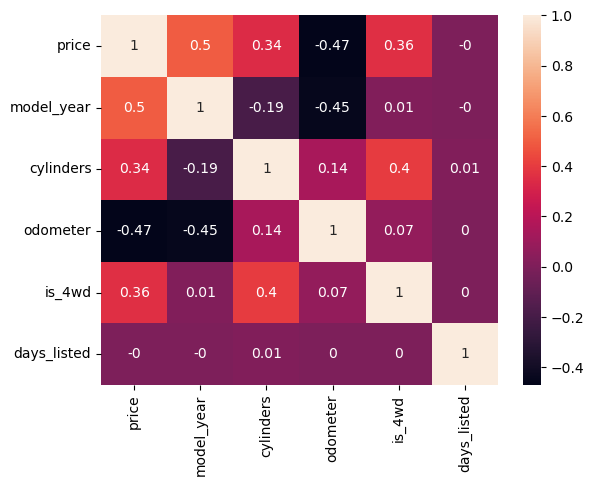

In [147]:
sns.heatmap(corr, annot = True);

In [148]:
corr

price  model_year  cylinders  odometer  is_4wd  days_listed
price         1.00        0.50       0.34     -0.47    0.36        -0.00
model_year    0.50        1.00      -0.19     -0.45    0.01        -0.00
cylinders     0.34       -0.19       1.00      0.14    0.40         0.01
odometer     -0.47       -0.45       0.14      1.00    0.07         0.00
is_4wd        0.36        0.01       0.40      0.07    1.00         0.00
days_listed  -0.00       -0.00       0.01      0.00    0.00         1.00

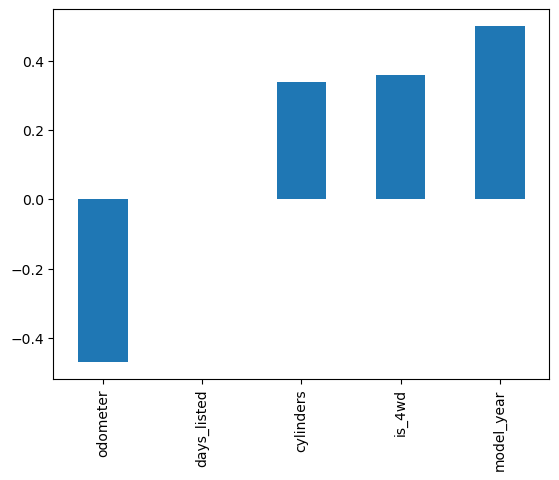

In [149]:
corr["price"].sort_values()[:-1].plot(kind = "bar");

## Categorical 

In [150]:
cat_columns = df.select_dtypes(include = "object").columns.tolist()

In [151]:
df[cat_columns].nunique()

model           100
condition         6
fuel              5
transmission      3
type             13
paint_color      12
dtype: int64

In [152]:
df.sample(5)

price  model_year                model  condition  cylinders fuel  \
18150  18900      2016.0            ford edge       good        4.0  gas   
25678  17995      2017.0          ford escape  excellent        4.0  gas   
26354  26900      2017.0      gmc sierra 1500   like new        8.0  gas   
15553  11900      2013.0   chevrolet suburban  excellent        8.0  gas   
42026  13000      2009.0  chevrolet silverado  excellent        8.0  gas   

       odometer transmission   type paint_color  is_4wd date_posted  \
18150   54000.0    automatic    SUV        grey     1.0  2019-01-26   
25678    8900.0    automatic    SUV        grey     0.0  2019-01-30   
26354   36000.0    automatic  truck        grey     1.0  2018-12-21   
15553   76500.0    automatic    SUV         NaN     1.0  2019-03-25   
42026   70396.0       manual  truck        grey     0.0  2018-07-04   

       days_listed  
18150           35  
25678           33  
26354           43  
15553           38  
42026           17

In [160]:
df.groupby("condition")["price"].mean().round(2)

condition
excellent    13026.24
fair          4590.17
good         10924.14
like new     15995.74
new          18792.81
salvage       6745.92
Name: price, dtype: float64

In [154]:
df.groupby("condition")["price"].agg(["mean", "median", "std"]).round(1)

mean   median      std
condition                           
excellent  13026.2  10950.0   8350.1
fair        4590.2   3500.0   3293.4
good       10924.1   7995.0   8047.7
like new   15995.7  13985.0  10076.4
new        18792.8  16499.0  12064.5
salvage     6745.9   5000.0   4935.1

In [155]:
df.groupby("condition")["price"].describe().round(2)

count      mean       std     min     25%      50%      75%  \
condition                                                                  
excellent  23339.0  13026.24   8350.15  1950.0  6750.0  10950.0  16995.0   
fair        1005.0   4590.17   3293.38  1950.0  2500.0   3500.0   5500.0   
good       19489.0  10924.14   8047.74  1950.0  4899.0   7995.0  15300.0   
like new    4456.0  15995.74  10076.37  1990.0  7500.0  13985.0  22988.0   
new          105.0  18792.81  12064.53  2400.0  8200.0  16499.0  29900.0   
salvage       65.0   6745.92   4935.13  2000.0  3000.0   5000.0   8750.0   

               max  
condition           
excellent  44000.0  
fair       35000.0  
good       43995.0  
like new   43999.0  
new        42500.0  
salvage    22000.0

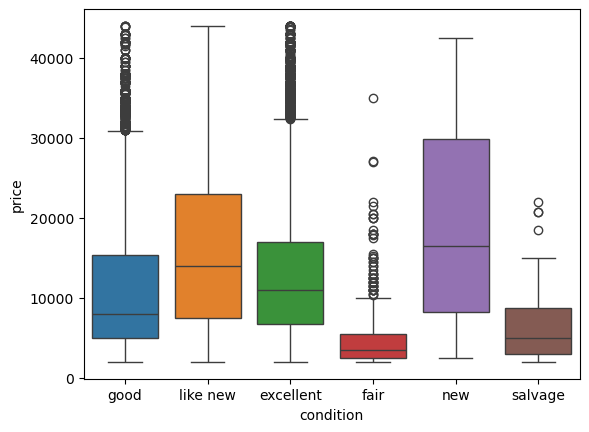

In [156]:
sns.boxplot(data = df, x = "condition", y = "price", hue = "condition");

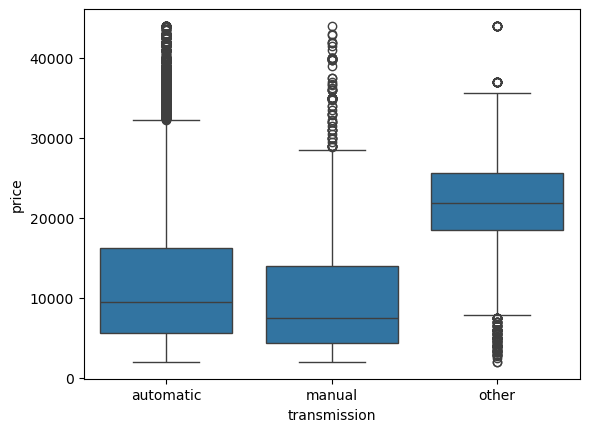

In [158]:
sns.boxplot(data = df, x = "transmission", y = "price");

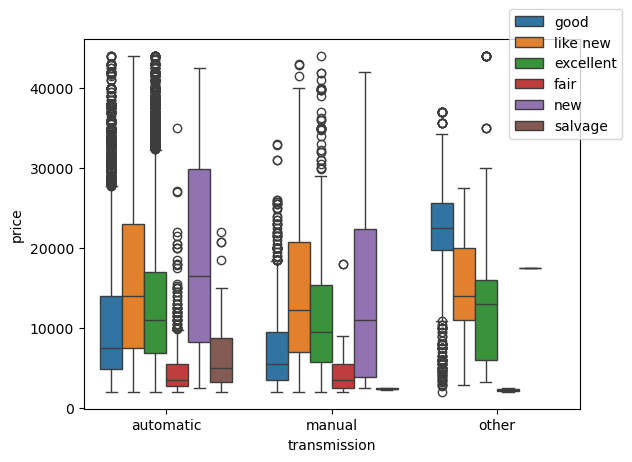

In [164]:
sns.boxplot(data = df, x = "transmission", y = "price", hue = "condition");
plt.legend(bbox_to_anchor=(1.1, 1.1));